# <span style="color:darkblue"> Lecture 21 - Subsetting and Pivoting  </span>

<font size = "5">


<font size = "5">

In the previous class ...

- ... we introduced parsing and
- ... data manipulation with time

In this class we will ...

- Plot multiple series
- Compute growth rates
- Use merge/pivot to change layout of data

# <span style="color:darkblue"> I. Import Libraries and Data and Question from Previous Lecture </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import data

In [2]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

Parse data and sort dataset

In [3]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial = financial.sort_values("date",ascending = True)

In [4]:
financial.dtypes

date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "5">

**Question:** what does ```[ns]``` mean in the ```datetime64[ns]``` column type?

**Answer:** The ```[ns]``` means the nano second-based time format that specifies the precision of the DateTime object.

<font size = "5">

Plot multiple columns

In [5]:
financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10
...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03


In [6]:
financial[["date","sp500","djia"]].set_index("date")

# this code redefines the index 

,sp500,djia
date,,
2018-04-04,2644.69,24264.30
2018-04-05,2662.84,24505.22
2018-04-06,2604.47,23932.76
2018-04-09,2613.16,23979.10
2018-04-10,2656.87,24408.00
...,...,...
2023-03-29,4027.81,32717.60
2023-03-30,4050.83,32859.03
2023-03-31,4109.31,33274.15


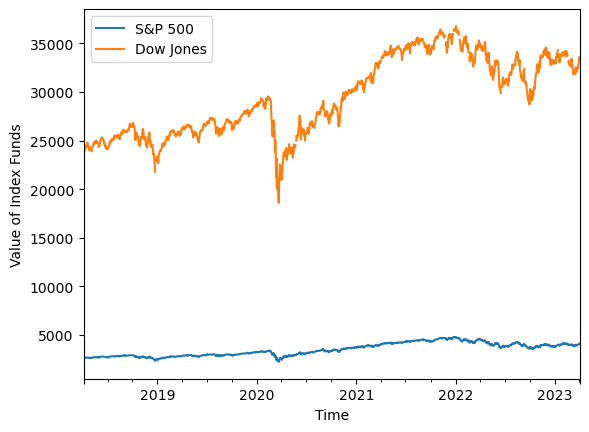

In [7]:
# Enter the x-axis column and y-axis columns you 
# wish to include. Specify the x-axis column with "set_index()"
# This applies to any line plot, with or without dates
# The legend is the box with the name of the lines
# If you drop the ".legend()" command this will assign
# the default column names to the legend.


financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])

# pandas - automatic plot function allowing you to plot many 
# plots at once quickly - use .plot()
# plot function by default puts index as x-axis
# so here we set that index as the date 


<font size = "5">

Remarks ...

- The S\&P 500 and Dow Jones have different units.
- More sensibile to compare their growth rate! (see below)

(Can also rescale one variable to make the plot more comparable)


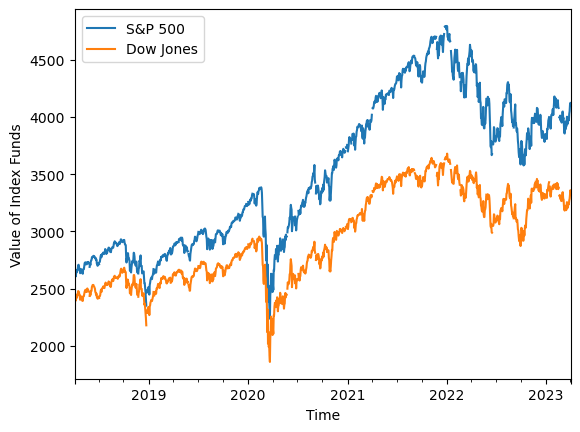

In [8]:
financial["djia_rescale"]=financial['djia']/10

financial[["date","sp500","djia_rescale"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])

# could also compare both indexes with percentage change/growth

# <span style="color:darkblue"> II. Time Difference/Growth </span>

<font size = "5">

Change between periods

In [9]:
# First sort columns by date. The second computes the
# differences in "sp500" between each row and the one before it
# By convention, the first row gets a missing value because
# there is nothing to compare. For this to work, it's important
# that the dataset is sorted.

financial["diff_sp500"] = financial["sp500"].diff()

financial

# difference calculated for every given period of time
# first value always will be a missing value because nothing 
# previously from which one can subtract

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale,diff_sp500
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430,NaN
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522,18.15
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276,-58.37
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910,8.69
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800,43.71
...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760,56.54
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903,23.02
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415,58.48
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115,15.20


rate of growth = (new-old)/old

diff gives us the numerator - need the old

<font size = "5">

Compute lag + percentage growth

In [10]:
# ".shif(1)" compute a new column with the value of "sp500"
# one period before. By convention the first column is assigned
# a missing value
# We can combine ".diff()" and ".shift()" to compute growth rates

financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = (financial["diff_sp500"]/financial["lag_sp500"])* 100

# the lag is the old that we need in the denominator 
# shift function moves all values one period in the future 

# times 100 makes it into a percentage value

financial 

# shift(-1) will move all the values UP in table 
# shift essentially resets the index to shift(1) would make index position 0 
# become index position 1 (0+1)
# shift can be used elsewhere, but does not have value unless used with 
# something that intrinsically has order like datetimes 

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale,diff_sp500,lag_sp500,growth_sp500
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430,NaN,NaN,NaN
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522,18.15,2644.69,0.686281
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276,-58.37,2662.84,-2.192021
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910,8.69,2604.47,0.333657
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800,43.71,2613.16,1.672687
...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760,56.54,3971.27,1.423726
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903,23.02,4027.81,0.571526
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415,58.48,4050.83,1.443655
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115,15.20,4109.31,0.369892


<font size = "5">

Time between dates

In [11]:
# In the financial data example, the price of the stock portfolios isn't recorded
# on weekends. Sometimes it's important to account for these differences in the
# legnth between time periods, when accounting for growth rates
# Can compute dt.days, dt.months, dt.year, etc.

financial["diff_date"]  = financial["date"]-financial["date"].shift(1)

# how many dates have passed between first observation and next
# inputs the unit of measure based on the time between (if there are years between,
# then it would use years as measure) - does not need to be same across board ie. 
# depends on your data 

financial["count_days"] = financial["diff_date"].dt.days
# changing format into how many days have passed with the datetime structure

financial 
 

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale,diff_sp500,lag_sp500,growth_sp500,diff_date,count_days
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430,NaN,NaN,NaN,NaT,NaN
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522,18.15,2644.69,0.686281,1 days,1.0
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276,-58.37,2662.84,-2.192021,1 days,1.0
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910,8.69,2604.47,0.333657,3 days,3.0
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800,43.71,2613.16,1.672687,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760,56.54,3971.27,1.423726,1 days,1.0
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903,23.02,4027.81,0.571526,1 days,1.0
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415,58.48,4050.83,1.443655,1 days,1.0
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115,15.20,4109.31,0.369892,3 days,3.0


<font size = "5">

Plot growth

Text(0.5, 1.0, 'Change in the S&P 500 Index')

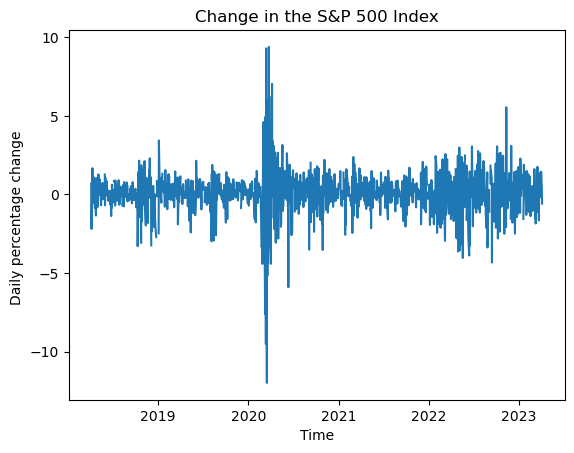

In [12]:
plt.plot("date", "growth_sp500",
          data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")

<font size = "5" >

Try it yourself!

- Compute a column with the growth of the Dow Jones
- Plot the growth of the S&P 500 and Dow Jones in a <br>
single plot

<Axes: xlabel='date'>

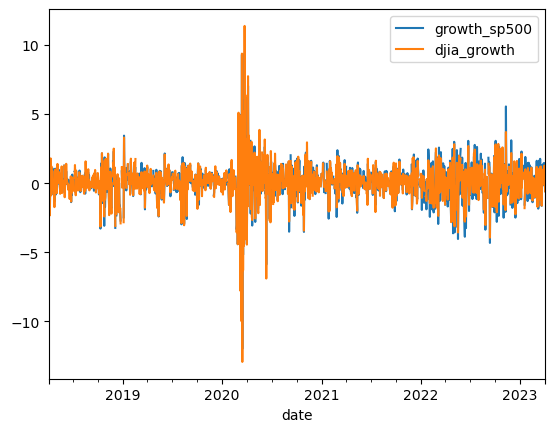

In [13]:
# Write your own code

financial['djia_growth'] = (financial['djia'].diff()/financial['djia'].shift(1))*100

financial[['date','growth_sp500','djia_growth']].set_index('date').plot()

# <span style="color:darkblue"> III. Subsetting with time data </span>

<font size = "5" >

Subsetting before/after

In [14]:
# Since the "date" column has a time format, Python
# will interpret "2019-01-01" as a date inside the query command
# Note: remember that you have to use single quotations for ".query()"

subset_before  = financial.query('date <= "2019-01-01" ')
subset_after   = financial.query('date >= "2020-01-01" ')

<font size = "5" >

Subsetting between two dates

In [15]:
# This command applies the function ".between()" to the column

subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

<font size = "5">

Flag observations

In [16]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

# creating boolean variables for these statements to flag as true/false
# flags highlight / specify times that we care about

<font size = "5">

Plot results

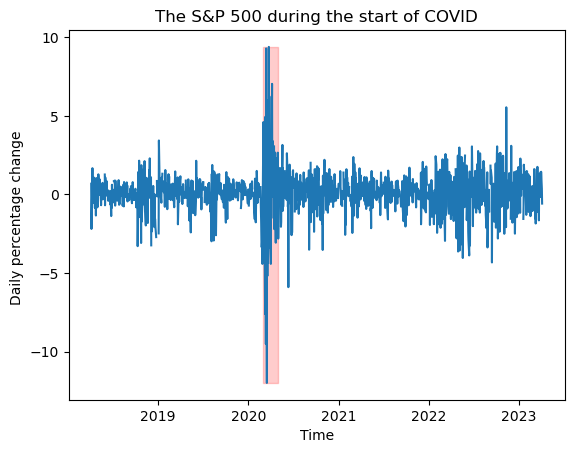

In [17]:
# Create a line plot using MatPlotLib
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

# y1 and y2 accounts for height of rectangle 
# width corresponds to the where argument 

# width is all the periods where the boolean column is True 
# highlights fact that COVID occurred during that time 

<font size = "5">

Try it yourself!

- Generate a plot of the daily growth of the Dow Jones 
- Highlight regions where there was growth higher than 4\% <br>
or below -4\%

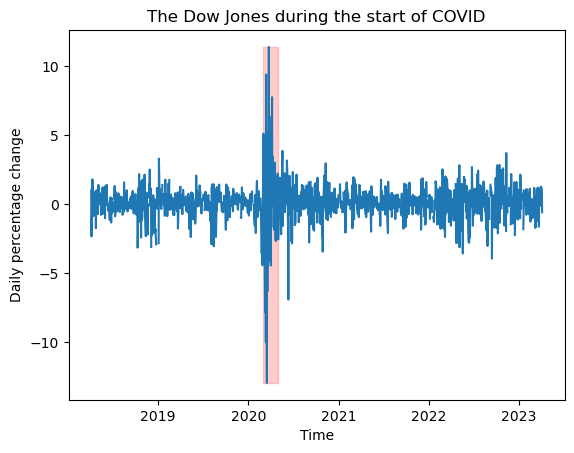

In [22]:
# Write your own code

plt.plot("date", "djia_growth", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("The Dow Jones during the start of COVID")

vec_y = financial["djia_growth"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

# <span style="color:darkblue"> IV. Wide and Long Format </span>

<font size = "5">

Data can come in a wide variety of formats

- Few rows, multiple columns (wide)
- Stacked rows, few columns (long)
- The **information** is the same!

<font size = "5">

Wide to long

$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>

In [24]:
financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale,diff_sp500,lag_sp500,growth_sp500,diff_date,count_days,djia_growth,bool_period,bool_example
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430,NaN,NaN,NaN,NaT,NaN,NaN,False,False
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522,18.15,2644.69,0.686281,1 days,1.0,0.992899,False,False
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276,-58.37,2662.84,-2.192021,1 days,1.0,-2.336074,False,False
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910,8.69,2604.47,0.333657,3 days,3.0,0.193626,False,False
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800,43.71,2613.16,1.672687,1 days,1.0,1.788641,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760,56.54,3971.27,1.423726,1 days,1.0,0.998171,False,False
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903,23.02,4027.81,0.571526,1 days,1.0,0.432275,False,False
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415,58.48,4050.83,1.443655,1 days,1.0,1.263336,False,False
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115,15.20,4109.31,0.369892,3 days,3.0,0.982745,False,False


In [25]:
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])

financial_long

,date,portfolio_type,portfolio_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15


<font size = "5">

Long to wide

$\quad$ <img src="figures/pivot_fig.png" alt="drawing" width="550"/>

In [29]:
financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))

# If you also want the index to be part of the dataset add
# ".reset_index()" to the end of the previous command

# the names for columns and values need to be what you used
# in the long code for var_name and val_name to all match

financial_wide

portfolio_type,date,djia,sp500
0,2018-04-04,24264.30,2644.69
1,2018-04-05,24505.22,2662.84
2,2018-04-06,23932.76,2604.47
3,2018-04-09,23979.10,2613.16
4,2018-04-10,24408.00,2656.87
...,...,...,...
1300,2023-03-29,32717.60,4027.81
1301,2023-03-30,32859.03,4050.83
1302,2023-03-31,33274.15,4109.31
1303,2023-04-03,33601.15,4124.51


<font size = "5">

Try it yourself!

- Convert the "growth_sp500" and <br>
"growth_djia" to long format

In [33]:
# Write your own code
# Note: You can give any custom value to "var_name" or "value_name"

financial_long_growth = pd.melt(financial,
                         var_name   = "Item Type",
                         value_name = "Value",
                         id_vars='date',
                         value_vars=['growth_sp500','djia_growth'])

financial_long_growth



,date,Item Type,Value
0,2018-04-04,growth_sp500,NaN
1,2018-04-05,growth_sp500,0.686281
2,2018-04-06,growth_sp500,-2.192021
3,2018-04-09,growth_sp500,0.333657
4,2018-04-10,growth_sp500,1.672687
...,...,...,...
2605,2023-03-29,djia_growth,0.998171
2606,2023-03-30,djia_growth,0.432275
2607,2023-03-31,djia_growth,1.263336
2608,2023-04-03,djia_growth,0.982745


In [39]:
financial_wide_growth = (pd.pivot(financial_long_growth,
                           index = 'date',
                           columns = 'Item Type',
                           values =  'Value').reset_index())

financial_wide_growth

Item Type,date,djia_growth,growth_sp500
0,2018-04-04,NaN,NaN
1,2018-04-05,0.992899,0.686281
2,2018-04-06,-2.336074,-2.192021
3,2018-04-09,0.193626,0.333657
4,2018-04-10,1.788641,1.672687
...,...,...,...
1300,2023-03-29,0.998171,1.423726
1301,2023-03-30,0.432275,0.571526
1302,2023-03-31,1.263336,1.443655
1303,2023-04-03,0.982745,0.369892
